# MENTORÍA: Predicción de indicadores sociales para países del MERCOSUR

# Práctico 4: Aprendizaje NO Supervisado

[Link a la descripción del proyecto](https://github.com/jfrau/DiploDatos2020/blob/master/README.md)

## Introducción

En este práctico volveremos a trabajar con el dataset resultante del **Práctico de Análisis y Curación** e intentaremos aplicar diferentes estrategias del *Aprendizaje No Supervisado* sobre el mismo con el objetivo de descubrir posibles patrones, agrupamientos o extraer otro tipo de información que no haya aflorado hasta el momento sobre los datos socio-ecónomicos de Argentina durante 1990-2018, en especial sobre la relación entre las variables. 

Así, teniendo en cuenta que se dispone de una serie de variables asociadas a diferentes indicadores (Educación, Salud, Pobreza, etc.) a lo largo del intervalo temporal 1990-2018 sobre Argentina (cuya estructura tiene una forma similar a lo que se muestra abajo), se plantea la siguiente situación hipotética a la cual tenemos que dar una respuesta basada en nuestro análisis:

**SITUACIÓN HIPOTÉTICA**


El gobierno argentino necesita reducir el presupuesto (y por lo tanto los recursos) que destina al cálculo de ciertas variables relacionadas con diferentes indicadores sociales (Pobreza, Educación, Protección Social, etc). Dada esta reducción presupuestaria, la idea es realizar solo la recopilación y el cálculo de aquellas variables *que más representen el comportamiento de la sociedad argentina* sobre estos indicadores y/o tener un mapeo de como se relacionan o interactúan entre sí (por ejemplo aquellas relacionadas con Educación con aquellas relacionadas Pobreza). Para poder tomar una decisión lo menos errada posible sobre a dónde destinar los recursos, el gobierno nacional decide recurrir a un grupo de especialistas en datos.

**Objetivo del Práctico**: Dar una respuesta a la situación hipotética planteada desde el punto de vista del Aprendizaje No Supervisado explorando la mayor cantidad de caminos posibles durante el proceso de análisis.

## Consignas Guía

1. **Estandarizar** el dataset usando alguna de las técnicas vistas en clase para variables continuas. Además, mostrar visualmente una comparación de la distribución de los datos originales (usando solo un par de variables y aquellas con órdenes de magnitud diferentes)  vs los resultantes luego de la estandarización. Análogo al práctico anterior, el siguiente [post](https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02) puede ser útil.
2. Teniendo en cuenta que las variables en consideración están linkeadas con 6 indicadores diferentes, implementar el **algoritmo de clustering Kmeans** con k=6. Intentar responder las siguientes preguntas disparadoras:
    - ¿Cómo son las proporciones relativas de los clusters y qué variables resultaron dentro de cada uno? ¿Y el coeficiente silueta? ¿Estas proporciones se corresponden a las 6 divisiones originales?
    - ¿Qué sucede si se varía la cantidad de clusters? Ayudarse del método del codo. 
    - ¿Qué sucede si en ambos casos cambio la distancia elegida por otra ? (Por ejemplo la similaridad coseno)
    - ¿Qué pueden concluir de los resultados? 
3. Elegir e implementar **otro algoritmo de clustering** (de los vistos en clases) y analizar los resultados en base a la métrica que corresponda. Intentar responder las siguientes preguntas disparadoras:
    - ¿Son diferentes los resultados con respecto al punto anterior? 
    - ¿Considera que un método es mejor que otro? ¿Por qué?
4. Teniendo en cuenta los datasets por Indicador (donde cada uno tiene aproximadamente 15 variables), aplicar un embedding tipo **PCA** sobre cada uno de los mismos. Intentar responder las siguientes preguntas disparadoras:
    - ¿Con cuántas componentes llegó a explicar los datos correspondientes a cada Indicador? 
    - ¿Qué resultados arroja la varianza explicada por las componentes? Puede ser muy útil visualizar esto último en un gráfico de componentes vs varianza acumulada.
    - ¿Vale la pena realizar reducción de componentes en todos los Indicadores? 
    - ¿La cantidad de datos dentro de cada indicador influye en los resultados?
4. Escribir una **conclusión final** en base a lo analizado donde intenten dar respuestas (o diferentes respuestas) a la situación hipótetica planteada, mostrando ventajas y desventajas sobre diferentes escenarios.

### Carga de datos y transformaciones

In [ ]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Setear el path de su drive personal donde se encuentran los datasets
#BASE_DIR = '/content/drive/My Drive/Mentoria/datasets/' # path de Nico
#BASE_DIR = '/content/drive/My Drive/Mentoria/Practico4/data/' # path de Pablo
#BASE_DIR = '/content/drive/My Drive/DiploDatos/Mentoria/datasets/' # path de Matt

# Habilitar el siguiente path si se corre localmente
# BASE_DIR = '/data/'

In [ ]:
# Carga del dataset
data = pd.read_csv(BASE_DIR + 'dataset_ARG_1990_2018_wide.csv')

In [ ]:
def histograms_plot(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(10,10))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax)
        tit = feature
        tit = (tit[:15] + '..') if len(tit) > 15 else tit
        ax.set_title(tit)
    fig.tight_layout()  
    plt.show()

In [ ]:
data.shape

(89, 32)

In [ ]:
data.head()

,Feat,Indi,ICod,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Ahorro ajustado: agotamiento de fuentes de ene...,Environment,NY.ADJ.DNGY.CD,2.824932e+09,1.663456e+09,2.000340e+09,2.083519e+09,2.077445e+09,2.549892e+09,3.538798e+09,3.429030e+09,1.882272e+09,3.070926e+09,5.432076e+09,4.115639e+09,4.308295e+09,5.003492e+09,6.317487e+09,9.064212e+09,1.043132e+10,1.045667e+10,1.388537e+10,7.603740e+09,9.681586e+09,1.392576e+10,1.389209e+10,1.298826e+10,1.086214e+10,4.693623e+09,3.245040e+09,4.892280e+09,4.892280e+09
1,Ahorro ajustado: agotamiento de minerales (US$...,Environment,NY.ADJ.DMIN.CD,3.641089e+07,7.626136e+06,1.052040e+07,2.046365e+06,3.335651e+06,2.413574e+06,2.786738e+06,3.415690e+07,9.252373e+07,1.036336e+08,9.469093e+07,8.809495e+07,8.971972e+07,1.086102e+08,2.188217e+08,3.091168e+08,6.430559e+08,6.530246e+08,9.293064e+08,9.265267e+08,1.676719e+09,2.322813e+09,2.284550e+09,1.547038e+09,1.493601e+09,1.278704e+09,1.346216e+09,1.401416e+09,1.401416e+09
2,Ahorro ajustado: agotamiento neto de recursos ...,Environment,NY.ADJ.DFOR.CD,1.475808e+08,1.322840e+08,1.563504e+08,1.307875e+08,1.028733e+08,1.465108e+08,1.260526e+08,9.940773e+07,9.071304e+07,4.921152e+07,4.043277e+07,1.785025e+07,4.318449e+07,4.295455e+07,4.713413e+07,3.196444e+07,3.006385e+07,2.470396e+07,1.152015e+07,2.895868e+07,6.533036e+07,4.628105e+07,1.044094e+08,1.710810e+08,7.911398e+07,9.507765e+07,9.924511e+07,9.940517e+07,9.940517e+07
3,Ahorro ajustado: consumo de capital fijo (US$ ...,Environment,NY.ADJ.DKAP.CD,1.078871e+10,1.366852e+10,1.549086e+10,1.598736e+10,1.809406e+10,1.959260e+10,2.066894e+10,2.879830e+10,2.982366e+10,3.010015e+10,3.018725e+10,2.977939e+10,1.380007e+10,1.492303e+10,1.713470e+10,1.903093e+10,2.161341e+10,2.633494e+10,3.325906e+10,3.283782e+10,3.821544e+10,4.447702e+10,4.721876e+10,5.029869e+10,5.095241e+10,6.020446e+10,5.855263e+10,6.995311e+10,6.995311e+10
4,Ahorro ajustado: daño por emisión de dióxido d...,Environment,NY.ADJ.DCO2.CD,9.818193e+08,1.089463e+09,1.190595e+09,1.219844e+09,1.335808e+09,1.463295e+09,1.618557e+09,1.730631e+09,1.825149e+09,2.014146e+09,2.054846e+09,2.033162e+09,1.980401e+09,2.257776e+09,2.797730e+09,3.047520e+09,3.507006e+09,3.687795e+09,4.184772e+09,4.128237e+09,4.501767e+09,4.821803e+09,5.076718e+09,5.251099e+09,5.942463e+09,6.264905e+09,6.321202e+09,6.767209e+09,6.767209e+09


A continuación, visualizamos los histogramas de frecuencias para los datos crudos, y para los datos con diversas transformaciones.

#### Datos crudos

In [ ]:
data.iloc[:, 3:32].columns

Index(['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018'],
      dtype='object')

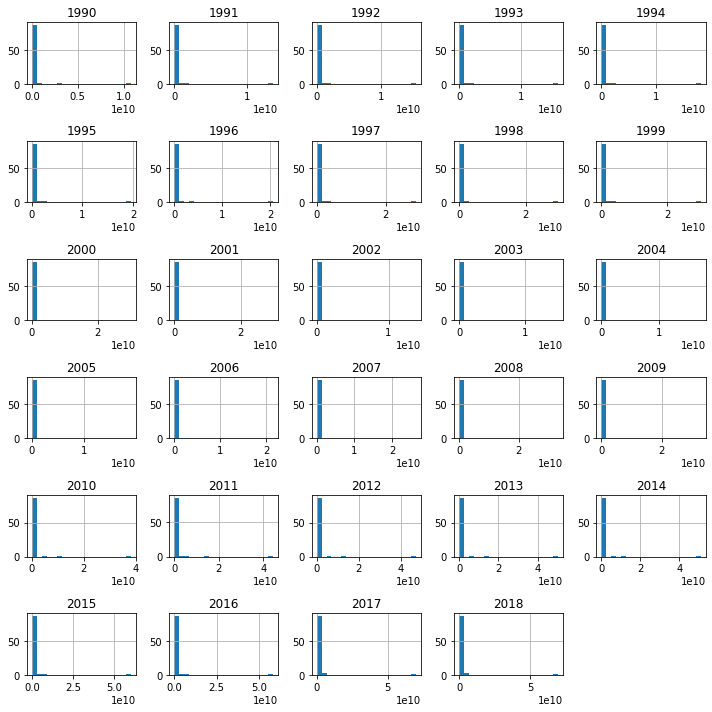

In [ ]:
# Datos sin estandarizar
histograms_plot(data, data.iloc[:, 3:32].columns, 6, 5)

Se observa una distribución muy sesgada hacia los valores cercanos a cero.

#### Datos escalados (entre 0 y 1)

Escalaremos los datos mediante la función MinMaxScaler, la cual escala los valores entre 0 y 1.

In [ ]:
# datos estandarizados
from sklearn import preprocessing

data_mm = data.iloc[:, 3:32]

In [ ]:
data_mm

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,2.824932e+09,1.663456e+09,2.000340e+09,2.083519e+09,2.077445e+09,2.549892e+09,3.538798e+09,3.429030e+09,1.882272e+09,3.070926e+09,5.432076e+09,4.115639e+09,4.308295e+09,5.003492e+09,6.317487e+09,9.064212e+09,1.043132e+10,1.045667e+10,1.388537e+10,7.603740e+09,9.681586e+09,1.392576e+10,1.389209e+10,1.298826e+10,1.086214e+10,4.693623e+09,3.245040e+09,4.892280e+09,4.892280e+09
1,3.641089e+07,7.626136e+06,1.052040e+07,2.046365e+06,3.335651e+06,2.413574e+06,2.786738e+06,3.415690e+07,9.252373e+07,1.036336e+08,9.469093e+07,8.809495e+07,8.971972e+07,1.086102e+08,2.188217e+08,3.091168e+08,6.430559e+08,6.530246e+08,9.293064e+08,9.265267e+08,1.676719e+09,2.322813e+09,2.284550e+09,1.547038e+09,1.493601e+09,1.278704e+09,1.346216e+09,1.401416e+09,1.401416e+09
2,1.475808e+08,1.322840e+08,1.563504e+08,1.307875e+08,1.028733e+08,1.465108e+08,1.260526e+08,9.940773e+07,9.071304e+07,4.921152e+07,4.043277e+07,1.785025e+07,4.318449e+07,4.295455e+07,4.713413e+07,3.196444e+07,3.006385e+07,2.470396e+07,1.152015e+07,2.895868e+07,6.533036e+07,4.628105e+07,1.044094e+08,1.710810e+08,7.911398e+07,9.507765e+07,9.924511e+07,9.940517e+07,9.940517e+07
3,1.078871e+10,1.366852e+10,1.549086e+10,1.598736e+10,1.809406e+10,1.959260e+10,2.066894e+10,2.879830e+10,2.982366e+10,3.010015e+10,3.018725e+10,2.977939e+10,1.380007e+10,1.492303e+10,1.713470e+10,1.903093e+10,2.161341e+10,2.633494e+10,3.325906e+10,3.283782e+10,3.821544e+10,4.447702e+10,4.721876e+10,5.029869e+10,5.095241e+10,6.020446e+10,5.855263e+10,6.995311e+10,6.995311e+10
4,9.818193e+08,1.089463e+09,1.190595e+09,1.219844e+09,1.335808e+09,1.463295e+09,1.618557e+09,1.730631e+09,1.825149e+09,2.014146e+09,2.054846e+09,2.033162e+09,1.980401e+09,2.257776e+09,2.797730e+09,3.047520e+09,3.507006e+09,3.687795e+09,4.184772e+09,4.128237e+09,4.501767e+09,4.821803e+09,5.076718e+09,5.251099e+09,5.942463e+09,6.264905e+09,6.321202e+09,6.767209e+09,6.767209e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,4.545700e+01,4.619700e+01,4.690100e+01,4.768000e+01,4.826300e+01,4.801800e+01,4.862900e+01,4.950800e+01,5.000700e+01,4.979500e+01,4.982600e+01,4.952400e+01,4.850100e+01,4.937200e+01,5.026500e+01,4.961100e+01,5.013000e+01,4.919600e+01,4.827800e+01,4.896300e+01,4.795200e+01,4.822800e+01,4.832400e+01,4.794200e+01,4.731800e+01,4.801600e+01,4.869900e+01,4.937000e+01,5.082200e+01
85,4.661288e+01,4.664759e+01,4.668231e+01,4.671702e+01,4.675283e+01,4.678827e+01,4.682372e+01,4.685770e+01,4.689241e+01,4.692238e+01,4.695819e+01,4.699327e+01,4.703127e+01,4.782548e+01,4.909032e+01,5.035188e+01,5.156010e+01,5.263037e+01,5.271368e+01,5.254230e+01,5.389028e+01,5.418261e+01,5.453815e+01,5.451805e+01,5.433571e+01,5.433571e+01,5.433571e+01,5.433571e+01,5.433571e+01
86,9.710636e+00,9.749003e+00,9.787371e+00,9.825738e+00,9.865202e+00,9.904300e+00,9.943399e+00,9.982863e+00,1.002123e+01,1.006033e+01,1.009979e+01,1.013853e+01,1.018091e+01,1.048109e+01,1.124534e+01,1.202091e+01,1.273582e+01,1.331280e+01,1.288454e+01,1.253047e+01,1.387844e+01,1.417077e+01,1.452631e+01,1.450621e+01,1.432387e+01,1.432387e+01,1.432387e+01,1.432387e+01,1.432387e+01
87,1.806000e+00,1.806000e+00,2.023000e+00,2.113000e+00,2.558000e+00,2.082000e+00,2.754000e+00,2.347000e+00,2.132000e+00,2.015000e+00,1.826000e+00,1.752000e+00,1.574000e+00,2.444000e+00,2.016000e+00,1.690000e+00,1.605000e+00,1.448000e+00,1.208000e+00,1.172000e+00,1.251000e+00,1.180000e+00,8.530000e-01,7.910000e-01,9.520000e-01,9.640000e-01,9.650000e-01,9.770000e-01,7.850000e-01


In [ ]:
mm_scaler = preprocessing.MinMaxScaler()
data_mm = mm_scaler.fit_transform(data_mm)

In [ ]:
data_mm = pd.DataFrame(data_mm, columns=data.iloc[:, 3:32].columns)

In [ ]:
data_mm.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,0.261842,0.121700,0.129130,0.130323,0.114814,0.130146,0.171213,0.119071,0.063113,0.102024,0.179946,0.138204,0.312194,0.335286,0.368695,0.476289,0.482632,0.397065,0.417491,0.231554,0.253342,0.313100,0.294207,0.258223,0.213182,0.077961,0.055421,0.069937,0.069937
1,0.003375,0.000558,0.000679,0.000128,0.000184,0.000123,0.000135,0.001186,0.003102,0.003443,0.003137,0.002958,0.006501,0.007278,0.012771,0.016243,0.029753,0.024797,0.027941,0.028215,0.043875,0.052225,0.048382,0.030757,0.029314,0.021239,0.022992,0.020034,0.020034
2,0.013679,0.009678,0.010093,0.008181,0.005685,0.007478,0.006099,0.003452,0.003042,0.001635,0.001339,0.000599,0.003129,0.002878,0.002751,0.001680,0.001391,0.000938,0.000346,0.000882,0.001710,0.001041,0.002211,0.003401,0.001553,0.001579,0.001695,0.001421,0.001421
3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,0.091004,0.079706,0.076858,0.076300,0.073826,0.074686,0.078309,0.060095,0.061198,0.066915,0.068070,0.068274,0.143507,0.151295,0.163279,0.160135,0.162261,0.140034,0.125824,0.125716,0.117800,0.108411,0.107515,0.104398,0.116628,0.104060,0.107958,0.096739,0.096739


In [ ]:
# Añadir columns faltantes (las columnas no numéricas de data)
data_mm["Feat"] = data.Feat
data_mm["Indi"] = data.Indi
data_mm["ICod"] = data.ICod

In [ ]:
data_mm.columns

Index(['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', 'Feat', 'Indi', 'ICod'],
      dtype='object')

In [ ]:
# Reordeno
data_mm = data_mm[['Feat', 'Indi', 'ICod', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018']]

In [ ]:
data_mm.head()

,Feat,Indi,ICod,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Ahorro ajustado: agotamiento de fuentes de ene...,Environment,NY.ADJ.DNGY.CD,0.261842,0.121700,0.129130,0.130323,0.114814,0.130146,0.171213,0.119071,0.063113,0.102024,0.179946,0.138204,0.312194,0.335286,0.368695,0.476289,0.482632,0.397065,0.417491,0.231554,0.253342,0.313100,0.294207,0.258223,0.213182,0.077961,0.055421,0.069937,0.069937
1,Ahorro ajustado: agotamiento de minerales (US$...,Environment,NY.ADJ.DMIN.CD,0.003375,0.000558,0.000679,0.000128,0.000184,0.000123,0.000135,0.001186,0.003102,0.003443,0.003137,0.002958,0.006501,0.007278,0.012771,0.016243,0.029753,0.024797,0.027941,0.028215,0.043875,0.052225,0.048382,0.030757,0.029314,0.021239,0.022992,0.020034,0.020034
2,Ahorro ajustado: agotamiento neto de recursos ...,Environment,NY.ADJ.DFOR.CD,0.013679,0.009678,0.010093,0.008181,0.005685,0.007478,0.006099,0.003452,0.003042,0.001635,0.001339,0.000599,0.003129,0.002878,0.002751,0.001680,0.001391,0.000938,0.000346,0.000882,0.001710,0.001041,0.002211,0.003401,0.001553,0.001579,0.001695,0.001421,0.001421
3,Ahorro ajustado: consumo de capital fijo (US$ ...,Environment,NY.ADJ.DKAP.CD,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,Ahorro ajustado: daño por emisión de dióxido d...,Environment,NY.ADJ.DCO2.CD,0.091004,0.079706,0.076858,0.076300,0.073826,0.074686,0.078309,0.060095,0.061198,0.066915,0.068070,0.068274,0.143507,0.151295,0.163279,0.160135,0.162261,0.140034,0.125824,0.125716,0.117800,0.108411,0.107515,0.104398,0.116628,0.104060,0.107958,0.096739,0.096739


In [ ]:
data_mm

,Feat,Indi,ICod,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Ahorro ajustado: agotamiento de fuentes de ene...,Environment,NY.ADJ.DNGY.CD,2.618415e-01,1.216998e-01,1.291303e-01,1.303229e-01,1.148136e-01,1.301457e-01,1.712134e-01,1.190706e-01,6.311337e-02,1.020236e-01,1.799460e-01,1.382043e-01,3.121937e-01,3.352865e-01,3.686954e-01,4.762885e-01,4.826321e-01,3.970647e-01,4.174912e-01,2.315544e-01,2.533423e-01,3.131002e-01,2.942070e-01,2.582226e-01,2.131821e-01,7.796138e-02,5.542091e-02,6.993656e-02,6.993656e-02
1,Ahorro ajustado: agotamiento de minerales (US$...,Environment,NY.ADJ.DMIN.CD,3.374906e-03,5.579343e-04,6.791358e-04,1.279989e-04,1.843506e-04,1.231880e-04,1.348273e-04,1.186073e-03,3.102360e-03,3.442959e-03,3.136785e-03,2.958253e-03,6.501396e-03,7.278026e-03,1.277067e-02,1.624287e-02,2.975264e-02,2.479689e-02,2.794145e-02,2.821523e-02,4.387543e-02,5.222503e-02,4.838225e-02,3.075703e-02,2.931365e-02,2.123935e-02,2.299155e-02,2.003364e-02,2.003364e-02
2,Ahorro ajustado: agotamiento neto de recursos ...,Environment,NY.ADJ.DFOR.CD,1.367919e-02,9.678005e-03,1.009307e-02,8.180679e-03,5.685474e-03,7.477862e-03,6.098649e-03,3.451861e-03,3.041647e-03,1.634926e-03,1.339399e-03,5.994163e-04,3.129294e-03,2.878406e-03,2.750799e-03,1.679605e-03,1.390982e-03,9.380680e-04,3.463762e-04,8.818696e-04,1.709528e-03,1.040561e-03,2.211186e-03,3.401302e-03,1.552703e-03,1.579246e-03,1.694973e-03,1.421026e-03,1.421026e-03
3,Ahorro ajustado: consumo de capital fijo (US$ ...,Environment,NY.ADJ.DKAP.CD,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
4,Ahorro ajustado: daño por emisión de dióxido d...,Environment,NY.ADJ.DCO2.CD,9.100433e-02,7.970600e-02,7.685787e-02,7.630050e-02,7.382579e-02,7.468609e-02,7.830865e-02,6.009491e-02,6.119803e-02,6.691483e-02,6.806998e-02,6.827415e-02,1.435066e-01,1.512947e-01,1.632786e-01,1.601351e-01,1.622607e-01,1.400343e-01,1.258235e-01,1.257159e-01,1.177997e-01,1.084111e-01,1.075149e-01,1.043983e-01,1.166277e-01,1.040605e-01,1.079576e-01,9.673922e-02,9.673922e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,"Tasa de población activa, mujeres (% de la pob...",Social_protection,SL.TLF.CACT.FE.ZS,4.207801e-09,3.379249e-09,3.027116e-09,2.982228e-09,2.667207e-09,2.450718e-09,2.352655e-09,1.718393e-09,1.674986e-09,1.652629e-09,1.649235e-09,1.661716e-09,3.501628e-09,3.298867e-09,2.927305e-09,2.601689e-09,2.314782e-09,1.864481e-09,1.448964e-09,1.488039e-09,1.251668e-09,1.082481e-09,1.021447e-09,9.509672e-10,9.266492e-10,7.963529e-10,8.311497e-10,7.055440e-10,7.256860e-10
85,Tierras agrícolas (% del área de tierra),Environment,AG.LND.AGRI.ZS,4.314938e-09,3.412215e-09,3.012998e-09,2.921995e-09,2.583745e-09,2.387953e-09,2.265312e-09,1.626364e-09,1.570552e-09,1.557193e-09,1.554234e-09,1.576734e-09,3.395126e-09,3.195233e-09,2.858749e-09,2.640620e-09,2.380949e-09,1.994892e-09,1.582331e-09,1.597039e-09,1.407057e-09,1.216361e-09,1.153051e-09,1.081707e-09,1.064380e-09,9.013238e-10,9.274171e-10,7.765303e-10,7.759156e-10
86,Tierras cultivables (% del área de tierra),Environment,AG.LND.ARBL.ZS,8.944884e-10,7.126837e-10,6.312761e-10,6.144665e-10,5.450855e-10,5.054067e-10,4.809770e-10,3.459118e-10,3.342457e-10,3.325465e-10,3.332424e-10,3.391412e-10,7.248242e-10,6.927674e-10,6.500746e-10,6.264784e-10,5.846435e-10,5.019111e-10,3.847886e-10,3.785706e-10,3.600503e-10,3.167540e-10,3.056791e-10,2.862224e-10,2.791013e-10,2.367245e-10,2.440688e-10,2.045495e-10,2.039348e-10
87,"Trabajadores familiares que contribuyen, mujer...",Gender

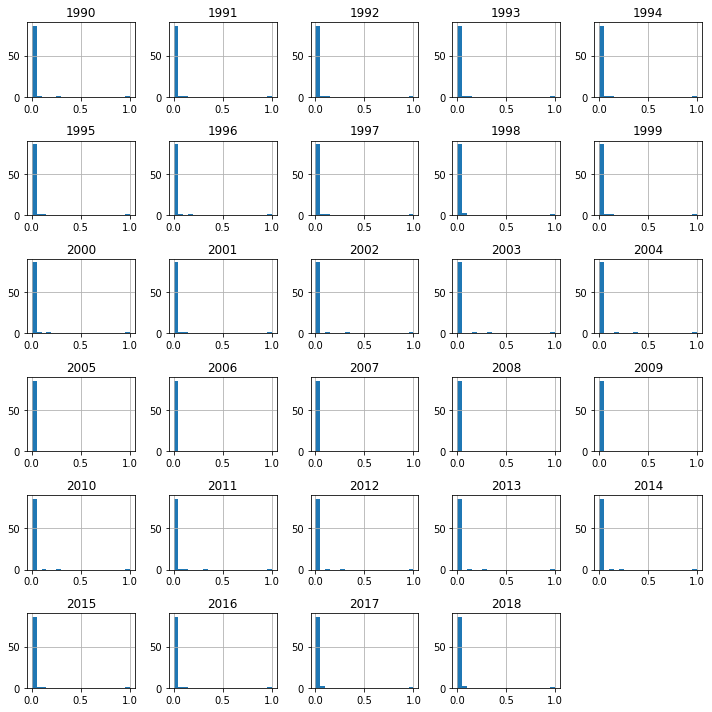

In [ ]:
# Datos estandarizados
histograms_plot(data_mm, data_mm.iloc[:, 3:32].columns, 6, 5)

Se observa que la estandarización no fucionó adecuadamente. Si bien los valores se encuentran entre 0 y 1, estos muestran la misma columna de datos cerca del cero (al igual que con los datos no estandarizados).

También, se intentó con otros métodos de estandarización tales como RobustScaler() y StandarScaler(), dee scikit-learn (análisis no mostrados). Estos tampoco funcionaron para el dataset.

Intentaremos un método clásico, que es la aplicación de logaritmo a todos los valores. Esta transformación acerca los valores que se encuentran muy lejos entre sí. Aplicamos, además, la función "replace" para convertir los infinitos transformados por log, y mantenerlos en cero.

#### Datos transformados con logaritmo

In [ ]:
data_log = np.log(data.iloc[:, 3:32]).replace(-np.inf, 0)


In [ ]:
data_log

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,21.761750,21.232163,21.416583,21.457324,21.454404,21.659317,21.987053,21.955543,21.355745,21.845245,22.415587,22.138060,22.183808,22.333402,22.566587,22.927600,23.068079,23.070506,23.354101,22.751906,22.993492,23.357006,23.354585,23.287311,23.108550,22.269471,21.900393,22.310924,22.310924
1,17.410378,15.847092,16.168827,14.531576,15.020178,14.696619,14.840382,17.346475,18.342976,18.456372,18.366129,18.293926,18.312201,18.503276,19.203768,19.549230,20.281742,20.297125,20.649949,20.646953,21.240105,21.566045,21.549435,21.159608,21.124456,20.969113,21.020563,21.060749,21.060749
2,18.809886,18.700462,18.867610,18.689084,18.449009,18.802610,18.652210,18.414740,18.323212,17.711638,17.515151,16.697528,17.580992,17.575653,17.668508,17.280134,17.218834,17.022474,16.259608,17.181380,17.994967,17.650243,18.463831,18.957648,18.186400,18.370204,18.413103,18.414715,18.414715
3,23.101766,23.338361,23.463516,23.495064,23.618850,23.698418,23.751898,24.083582,24.118568,24.127796,24.130686,24.117082,23.347940,23.426172,23.564372,23.669331,23.796580,23.994162,24.227593,24.214847,24.366506,24.518238,24.578057,24.641245,24.654158,24.821012,24.793192,24.971091,24.971091
4,20.704918,20.808951,20.897719,20.921988,21.012802,21.103956,21.204801,21.271752,21.324928,21.423461,21.443467,21.432858,21.406565,21.537646,21.752074,21.837594,21.978029,22.028294,22.154718,22.141116,22.227736,22.296414,22.347931,22.381703,22.505389,22.558229,22.567175,22.635355,22.635355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,3.816767,3.832915,3.848039,3.864512,3.876665,3.871576,3.884220,3.902134,3.912163,3.907915,3.908537,3.902457,3.881584,3.899383,3.917309,3.904213,3.914620,3.895812,3.876976,3.891065,3.870201,3.875940,3.877928,3.869992,3.856891,3.871534,3.885659,3.899343,3.928329
85,3.841877,3.842621,3.843365,3.844109,3.844875,3.845633,3.846390,3.847115,3.847856,3.848495,3.849258,3.850004,3.850813,3.867558,3.893662,3.919036,3.942748,3.963293,3.964875,3.961619,3.986950,3.992360,3.998900,3.998532,3.995182,3.995182,3.995182,3.995182,3.995182
86,2.273222,2.277165,2.281093,2.285005,2.289014,2.292969,2.296909,2.300870,2.304706,2.308600,2.312515,2.316343,2.320515,2.349573,2.419954,2.486648,2.544419,2.588726,2.556028,2.528163,2.630337,2.651181,2.675961,2.674577,2.661928,2.661928,2.661928,2.661928,2.661928
87,0.591114,0.591114,0.704582,0.748109,0.939226,0.733329,1.013054,0.853138,0.757060,0.700619,0.602128,0.560758,0.453620,0.893636,0.701115,0.524729,0.473124,0.370183,0.188966,0.158712,0.223943,0.165514,-0.158996,-0.234457,-0.049190,-0.036664,-0.035627,-0.023269,-0.242072


In [ ]:
# Añadir columns faltantes (las columnas no numéricas de data)
data_log["Feat"] = data.Feat
data_log["Indi"] = data.Indi
data_log["ICod"] = data.ICod

In [ ]:
# Reordeno
data_log = data_log[['Feat', 'Indi', 'ICod', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018']]

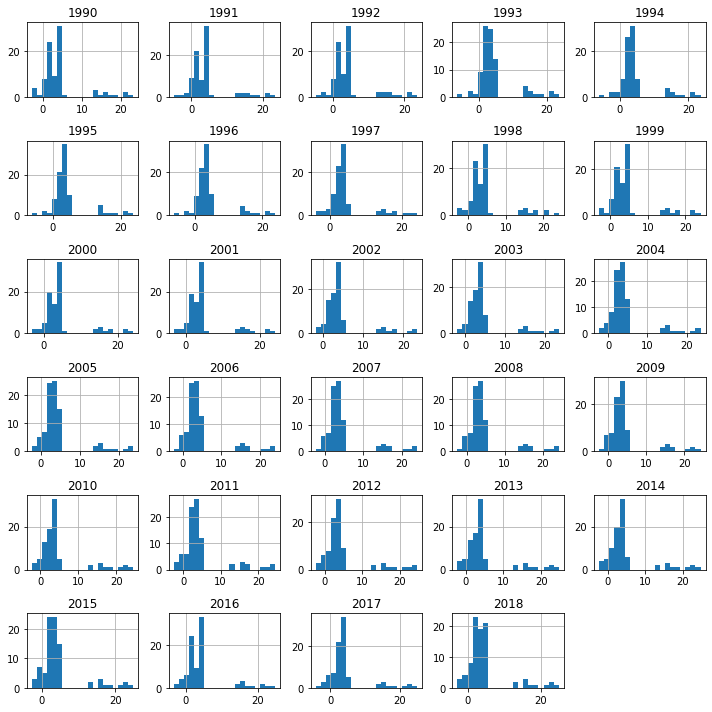

In [ ]:
histograms_plot(data_log, data_log.iloc[:, 3:32].columns, 6, 5)

Se observa que la transformación logarítmica mejoró el histograma, al acercar los valores muy pequeños a los muy grandes.

### Clustering con KMeans (K = 6)

A continuación, aplicaremos clustering mediante KMeans sobre el dataset. Éste método requiere especificar el número de clusters esperado. Dado que el dataset incluye a los Features de 6 Indicadores, intentaremos con k = 6. Esto lo aplicaremos para el dataset con los datos sin transformar, y con el dataset con transformaciones.

#### Datos crudos


In [ ]:
from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition

In [ ]:
# Número de clusters buscado
n_clust = 6

km = KMeans(n_clusters=n_clust, random_state=13)
km.fit(data.iloc[:, 3:32])

# Recuperacion de etiquetas
clusters = km.labels_
print('Suma de los cuadrados de las distancias al cluster / Inertia: ', km.inertia_)

Suma de los cuadrados de las distancias al cluster / Inertia:  9753775357432236.0


In [ ]:
clusters

array([2, 4, 5, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=int32)

A ojo, se observa que la clusterización no tiene sentido. La pertenencia de la mayoría de los Features es hacia un cluster particular, el cual aglomera a los 6 distintos indicadores.

#### Datos escalados (entre 0 y 1)

In [ ]:
# Número de clusters buscado
n_clust = 6

km = KMeans(n_clusters=n_clust, random_state=13)
km.fit(data_mm.iloc[:, 3:32])

# Recuperacion de etiquetas
clusters = km.labels_
print('Suma de los cuadrados de las distancias al cluster / Inertia: ', km.inertia_)

Suma de los cuadrados de las distancias al cluster / Inertia:  1.7273196771150923e-05


In [ ]:
clusters

array([2, 4, 5, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=int32)

Se observa lo mismo que para los datos crudos, la clusterización no tiene sentido. La pertenencia de la mayoría de los Features es hacia un cluster particular, el cual aglomera a los 6 distintos indicadores.

#### Datos transformados con logaritmo

In [ ]:
# Número de clusters buscado
n_clust = 6

km = KMeans(n_clusters=n_clust, random_state=13)
km.fit(data_log.iloc[:, 3:32])

# Recuperacion de etiquetas
clusters = km.labels_
print('Suma de los cuadrados de las distancias al cluster / Inertia: ', km.inertia_)

Suma de los cuadrados de las distancias al cluster / Inertia:  1383.8261787149477


In [ ]:
clusters

array([3, 1, 1, 3, 3, 2, 4, 2, 2, 2, 2, 2, 5, 0, 5, 5, 0, 4, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 5, 5, 0, 4, 0, 0, 4, 2, 4, 4, 2,
       0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       0], dtype=int32)

El clustering con los datos transformados mediante logaritmo sí tiene más sentido: diversos Features fueron asociados a distintos clusters. Queda evaluar si dichos clusters coinciden más o menos con los indicadores del dataset.

In [ ]:
data_log.head()

,Feat,Indi,ICod,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Ahorro ajustado: agotamiento de fuentes de ene...,Environment,NY.ADJ.DNGY.CD,21.761750,21.232163,21.416583,21.457324,21.454404,21.659317,21.987053,21.955543,21.355745,21.845245,22.415587,22.138060,22.183808,22.333402,22.566587,22.927600,23.068079,23.070506,23.354101,22.751906,22.993492,23.357006,23.354585,23.287311,23.108550,22.269471,21.900393,22.310924,22.310924
1,Ahorro ajustado: agotamiento de minerales (US$...,Environment,NY.ADJ.DMIN.CD,17.410378,15.847092,16.168827,14.531576,15.020178,14.696619,14.840382,17.346475,18.342976,18.456372,18.366129,18.293926,18.312201,18.503276,19.203768,19.549230,20.281742,20.297125,20.649949,20.646953,21.240105,21.566045,21.549435,21.159608,21.124456,20.969113,21.020563,21.060749,21.060749
2,Ahorro ajustado: agotamiento neto de recursos ...,Environment,NY.ADJ.DFOR.CD,18.809886,18.700462,18.867610,18.689084,18.449009,18.802610,18.652210,18.414740,18.323212,17.711638,17.515151,16.697528,17.580992,17.575653,17.668508,17.280134,17.218834,17.022474,16.259608,17.181380,17.994967,17.650243,18.463831,18.957648,18.186400,18.370204,18.413103,18.414715,18.414715
3,Ahorro ajustado: consumo de capital fijo (US$ ...,Environment,NY.ADJ.DKAP.CD,23.101766,23.338361,23.463516,23.495064,23.618850,23.698418,23.751898,24.083582,24.118568,24.127796,24.130686,24.117082,23.347940,23.426172,23.564372,23.669331,23.796580,23.994162,24.227593,24.214847,24.366506,24.518238,24.578057,24.641245,24.654158,24.821012,24.793192,24.971091,24.971091
4,Ahorro ajustado: daño por emisión de dióxido d...,Environment,NY.ADJ.DCO2.CD,20.704918,20.808951,20.897719,20.921988,21.012802,21.103956,21.204801,21.271752,21.324928,21.423461,21.443467,21.432858,21.406565,21.537646,21.752074,21.837594,21.978029,22.028294,22.154718,22.141116,22.227736,22.296414,22.347931,22.381703,22.505389,22.558229,22.567175,22.635355,22.635355


In [ ]:
# Función que devuelve un dataframe con la cantidad de observaciones de cada cluster
# que fue asignada a cada indicador
def cluster_prop(n_clusters, normalize, data, clusters):
  def cluster_description(cluster_id, normalize, data):
    dat = data[data.cluster == cluster_id].Indi.value_counts(normalize=normalize)
    d = {"indi": dat.index, "freq_abs": dat}
    df = pd.DataFrame(d)
    return df
  df_tmp = data.copy()
  df_tmp["cluster"] = clusters
  df_tmp = df_tmp.loc[:, ["Feat", "Indi", "cluster"]]
  d = {"indicator": df_tmp.Indi.unique()}
  df = pd.DataFrame(d)
  for i in range(n_clusters):
    df["cluster_%d" % i] = [0] * 6
    tmp = cluster_description(i, normalize, df_tmp)
    for j in range(6):
      if df.iloc[j, 0] in tmp.indi:
        df.iloc[j, i + 1] = tmp[tmp.indi == df.iloc[j, 0]].freq_abs[0]
  return df

In [ ]:
df_clust_abs = cluster_prop(6, normalize = False, data = data_log, clusters = clusters)

In [ ]:
df_clust_abs

,indicator,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5
0,Environment,1,2,4,3,3,2
1,Poverty,4,0,9,0,1,0
2,Education,8,1,2,0,1,3
3,Social_protection,12,0,3,0,0,0
4,Gender,12,0,2,0,1,0
5,Health,2,0,13,0,0,0


In [ ]:
df_clust_abs_melt = pd.melt(df_clust_abs, id_vars = "indicator")

Text(0, 0.5, 'nº de observaciones')

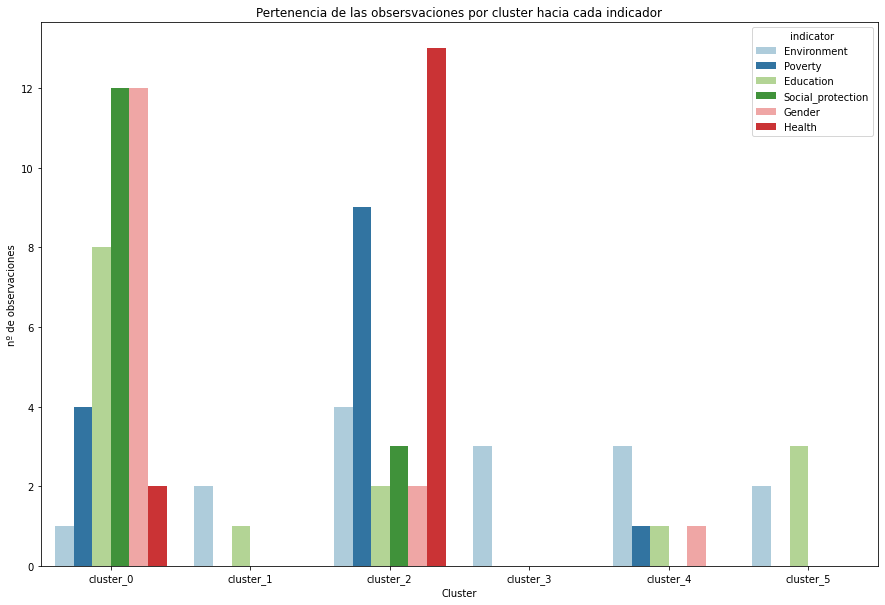

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x = "variable", y = "value", hue = "indicator", data = df_clust_abs_melt, palette = sns.color_palette("Paired"))
plt.title("Pertenencia de las obsersvaciones por cluster hacia cada indicador")
plt.xlabel("Cluster")
plt.ylabel("nº de observaciones")

A simple vista, se observa que distintos clusters incluyen observaciones relacionadas con distintos indicadores. En particular, el cluster 2 parece estar más asociado al indicador de Salud; y el cluster 0 al de Género. Estos dos clusters aglomeran a la mayor cantidad de Features. Sin embargo, no se observa una asociación cluster-indicador muy clara.

### Elección de la cantidad de clusters con K-Means

Se utilizará el "método del codo" y el análisis de silueta para elegir la cantidad óptima de clusters. Sólo se trabajará con el dataset con valores transformados con logaritmo, ya que en el análisis anterior (Kmeans con 6 clusters), pareció dar los mejores resultados.

Text(0.5, 1.0, 'Inertia de k-Means versus número de clusters')

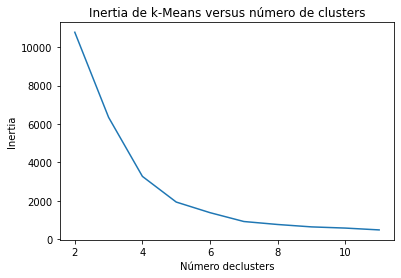

In [ ]:
#Prueba: para elegir el hiperparámetro n_clusters, variando de 2 a 11 clusters
scores = [KMeans(n_clusters=i+2).fit(data_log.iloc[:, 3:32]).inertia_ for i in range(10)]

from matplotlib import pyplot as plt
plt.plot(np.arange(2, 12), scores)
plt.xlabel('Número declusters')
plt.ylabel("Inertia")
plt.title("Inertia de k-Means versus número de clusters")

Según el gráfico, el "codo" se observa entre los valores de cantidad de clusters de 4 y 6 clusters. Analizaremos los gráficos de silueta para determinar la mejor subdivisión entre estas opciones.

Para n_clusters = 4 El coeficiente de silueta medio fue: 0.6200631058374123
Para n_clusters = 5 El coeficiente de silueta medio fue: 0.6582651470739715
Para n_clusters = 6 El coeficiente de silueta medio fue: 0.6507158231391805


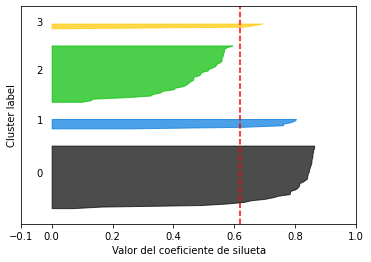

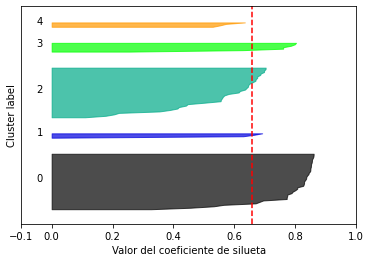

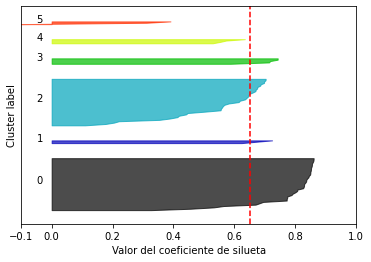

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = [4, 5, 6]

X = data_log.iloc[:, 3:32]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots()

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("Para n_clusters =", n_clusters,
          "El coeficiente de silueta medio fue:", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_xlabel("Valor del coeficiente de silueta")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

El análisis de silueta muestra que ninguna de las opciones propuestas parece ser la adecuada para clasificar los datos. En los tres gráficos, los bloques varían mucho en su altura, distinguiéndose 2 grandes bloques, y el resto de los clusters muy angostos. Además, en algunos bloques se observan valores negativos para el coeficiente de silueta. Esto indica que probablemente estos datos fueron asignados a ese cluster de erroneamente. Por último, la línea roja vertical muestra el promedio del coeficiente de silueta. En los tres gráficos se observa que varios bloques se alejan bastante de dicho promedio, lo cual indica una mala clasificación.

### Clustering con MeanShift

A continuación, aplicamos clustering mediante MeanShift para el dataset con los valores transformados con logaritmo.

In [ ]:
# Funcion para graficar los gráficos de silueta
def silueta(range_n_clusters, X, clusterer):
  for n_clusters in range_n_clusters:
      # Create a subplot with 1 row and 2 columns
      fig, ax1 = plt.subplots()

      # The 1st subplot is the silhouette plot
      # The silhouette coefficient can range from -1, 1 but in this example all
      # lie within [-0.1, 1]
      ax1.set_xlim([-0.1, 1])
      # The (n_clusters+1)*10 is for inserting blank space between silhouette
      # plots of individual clusters, to demarcate them clearly.
      ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

      # Initialize the clusterer with n_clusters value and a random generator
      # seed of 10 for reproducibility.
      #clusterer = KMeans(n_clusters=n_clusters, random_state=10)
      cluster_labels = clusterer.fit_predict(X)

      # The silhouette_score gives the average value for all the samples.
      # This gives a perspective into the density and separation of the formed
      # clusters
      silhouette_avg = silhouette_score(X, cluster_labels)
      print("For n_clusters =", n_clusters,
            "The average silhouette_score is :", silhouette_avg)

      # Compute the silhouette scores for each sample
      sample_silhouette_values = silhouette_samples(X, cluster_labels)

      y_lower = 10
      for i in range(n_clusters):
          # Aggregate the silhouette scores for samples belonging to
          # cluster i, and sort them
          ith_cluster_silhouette_values = \
              sample_silhouette_values[cluster_labels == i]

          ith_cluster_silhouette_values.sort()

          size_cluster_i = ith_cluster_silhouette_values.shape[0]
          y_upper = y_lower + size_cluster_i

          color = cm.nipy_spectral(float(i) / n_clusters)
          ax1.fill_betweenx(np.arange(y_lower, y_upper),
                            0, ith_cluster_silhouette_values,
                            facecolor=color, edgecolor=color, alpha=0.7)

          # Label the silhouette plots with their cluster numbers at the middle
          ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

          # Compute the new y_lower for next plot
          y_lower = y_upper + 10  # 10 for the 0 samples

      ax1.set_title("The silhouette plot for the various clusters.")
      ax1.set_xlabel("The silhouette coefficient values")
      ax1.set_ylabel("Cluster label")

      # The vertical line for average silhouette score of all the values
      ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

      ax1.set_yticks([])  # Clear the yaxis labels / ticks
      ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
      plt.show()

In [ ]:
from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition

ms = MeanShift(bandwidth=2, bin_seeding=True)

ms.fit(data_log.iloc[:, 3:32])

clusters2 = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(clusters2)
n_clusters_ = len(labels_unique)

print("Numero estimado de clusters para Mean Shift : %d" % n_clusters_)

Numero estimado de clusters para Mean Shift : 4


El output de MeanShift arrojó 4 clusters.

In [ ]:
clusters2

array([2, 2, 2, 2, 2, 1, 3, 1, 1, 1, 1, 1, 2, 0, 2, 2, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 3, 0, 1, 0, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 3, 1, 1, 1, 2, 2, 0, 3, 0, 0, 3, 3, 3, 3, 3,
       0, 0, 0, 3, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3,
       0])

In [ ]:
df_clust_abs = cluster_prop(4, normalize = False, data = data_log, clusters = clusters2)

In [ ]:
df_clust_abs_melt = pd.melt(df_clust_abs, id_vars = "indicator")

Text(0, 0.5, 'nº de observaciones')

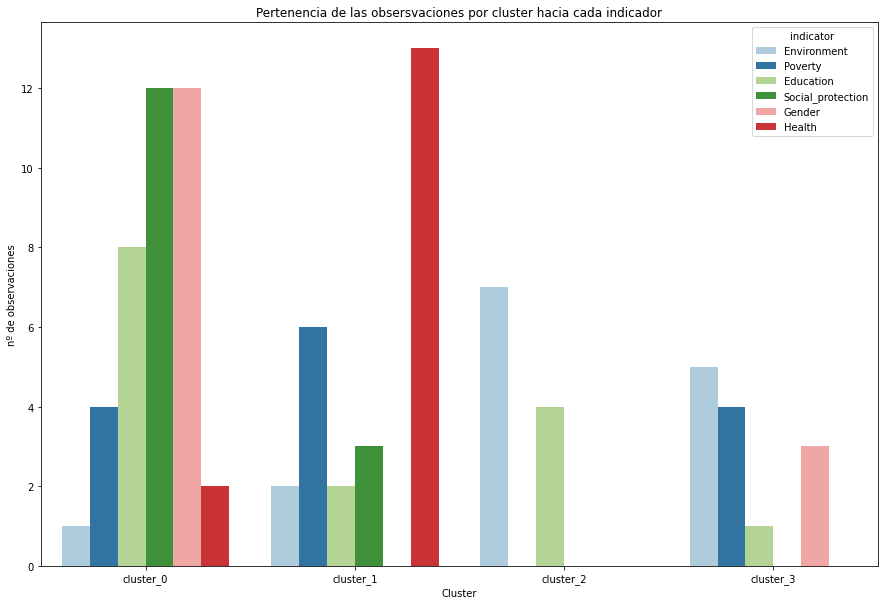

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x = "variable", y = "value", hue = "indicator", data = df_clust_abs_melt, palette = sns.color_palette("Paired"))
plt.title("Pertenencia de las obsersvaciones por cluster hacia cada indicador")
plt.xlabel("Cluster")
plt.ylabel("nº de observaciones")

Otra vez, no existe una relación clara cluster-indicador. Particularmente el cluster 1 se relaciona con Salud, y el cluster 0 con Género.

For n_clusters = 4 The average silhouette_score is : 0.6402092745391199


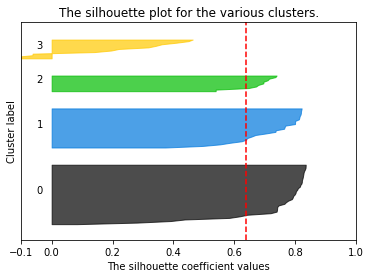

In [ ]:
clusterer = MeanShift(bandwidth=2, bin_seeding=True)
silueta([4], data_log.iloc[:, 3:32], clusterer)

El gráfico de silueta muestra bloques de diferente grosor y valores negativos para el cluster 3, lo cual indica una mala clasificación.

### Clustering con DBSCAN

A continuación, aplicamos clustering con DBSCAN. Este método genera clusters por "densidad". Posee un hiperparámetro llamado "eps" que define a esa densidad. El mismo debe ser especificado correctamente para obtener una buena clasificación. Para determinar el valor óptimo de "eps", graficaremos el valor de este en función de la "distancia al vecino más cercano". Ver https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc en donde explica el método claramente.

In [ ]:
from sklearn.neighbors import NearestNeighbors

In [ ]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(data_log.iloc[:, 3:32])
distances, indices = nbrs.kneighbors(data_log.iloc[:, 3:32])

Text(0, 0.5, 'eps')

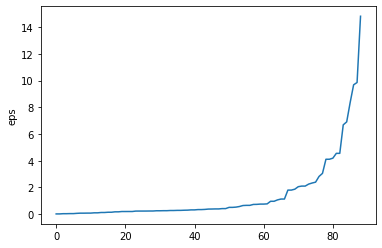

In [ ]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.ylabel("eps")

Para obtener el valor óptimo de "eps", debemos encontrar el punto de máxima curvatura, y leer el valor de "eps" en el eje vertical. Este punto se encuentra aproximadamente en eps = 4. Entrenaremos un DBSCAN con el hiperparámetro en este valor.

In [ ]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=4, min_samples=2).fit(data_log.iloc[:, 3:32])
clustering.labels_

clustering

DBSCAN(algorithm='auto', eps=4, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=2, n_jobs=None, p=None)

In [ ]:
pd.unique(clustering.labels_)

array([-1,  0,  1,  2])

Simplemente para que no haya error de programación, convertimos el label -1 a 3. Tener en cuenta que -1 (a partir de ahora 3) hace referencia a muestras no clasificadas por DBSCAN.

In [ ]:
cluster_labels = np.array(clustering.labels_)
cluster_labels = np.where(cluster_labels==-1, 3, cluster_labels)

In [ ]:
df_clust_abs = cluster_prop(4, normalize = False, data = data_log, clusters = cluster_labels)

In [ ]:
df_clust_abs_melt = pd.melt(df_clust_abs, id_vars = "indicator")

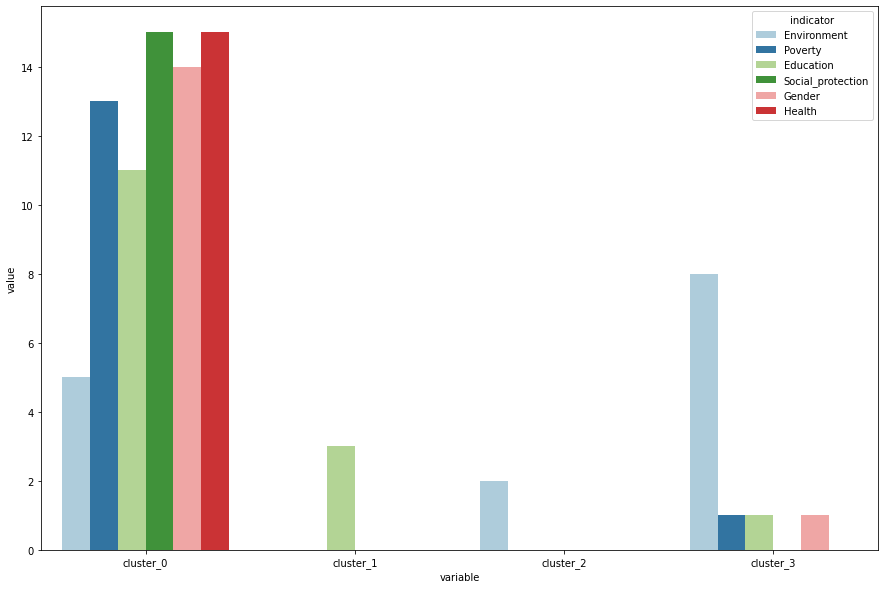

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x = "variable", y = "value", hue = "indicator", data = df_clust_abs_melt, palette = sns.color_palette("Paired"))

El clustering con DBSCAN muestra la existencia de un gran grupo (cluster 0) que abarca a todos los indicadores. Particularmente, muchas muestras (i.e. features) de Ambiente fueron clasificadas como "ruido" (en el gráfico, los valores iguales a 3).

### PCA

A continuación, realizaremos Análisis de Componentes Principales (PCA) para los distintos indicadores por separado. Los datasets consisten en 15 filas (salvo para el indicador Pobreza, el cual posee 14 filas), una por Feature, y 32 columnas, en donde se encuentran los años (desde 1990 a 2018).

Mediante PCA, se pretende observar potenciales asociaciones de diferentes Features por indicador. Si estas asociaciones se encuentran, estas indicarían que los diferentes Features se relacionan en la escala temporal estudiada.

#### Pobreza


In [ ]:
data_pobreza = data[data.Indi == "Poverty"]

In [ ]:
data_pobreza.shape

(14, 32)

In [ ]:
from sklearn import preprocessing
std_scale=preprocessing.StandardScaler().fit(data_pobreza.iloc[:, 3:33])
X_scaled=std_scale.transform(data_pobreza.iloc[:, 3:33]) 

In [ ]:
from sklearn import decomposition
pca=decomposition.PCA(n_components=4) 
pca.fit(X_scaled) #input data is centered but not scaled for each feature before applying the SVD

# proporción de varianza
print('proporción de varianza por componente: ', pca.explained_variance_ratio_)
# proporción de varianza acumulada
print ('proporción de varianza por componente acumulada: ', pca.explained_variance_ratio_.cumsum())

X_projected=pca.transform(X_scaled) #numpy array
print ('tamaño de los datos: ', X_projected.shape)

proporción de varianza por componente:  [9.75683837e-01 2.35442405e-02 6.11781312e-04 9.42338999e-05]
proporción de varianza por componente acumulada:  [0.97568384 0.99922808 0.99983986 0.99993409]
tamaño de los datos:  (14, 4)


In [ ]:
df = pd.DataFrame(data=X_projected, columns=["C1", "C2", "C3", "C4"])

In [ ]:
df.shape

(14, 4)

A continuación, graficamos las primeras dos componentes del PCA, y los puntos (Features) con los valores correspondientes para cada componente. Puntos cercanos indican "similaridad". En este caso, puntos cercanos indican Features con comportamiento similar respecto a sus valores a través del tiempo.

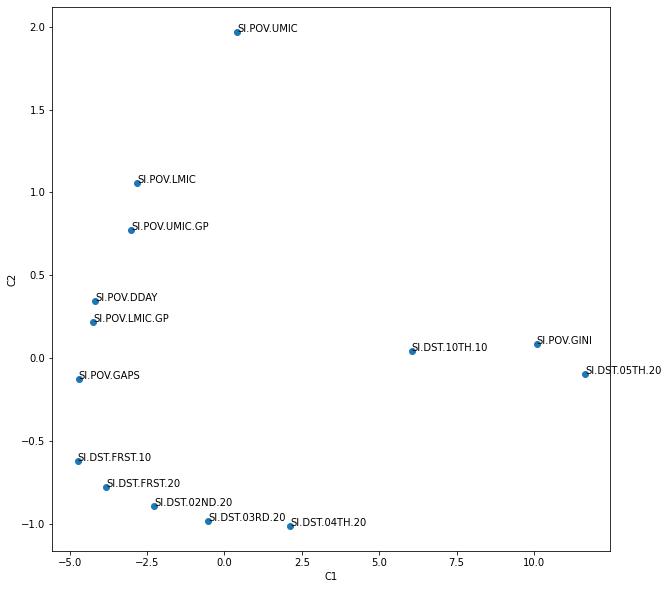

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(df.C1, df.C2)
ax.set_xlabel("C1")
ax.set_ylabel("C2")

for i, txt in enumerate(data_pobreza.ICod):
    plt.annotate(txt, (df.C1[i], df.C2[i]))

A continuación, graficamos a las mismas dos primeras componentes y los vectores que indican la importancia de cada variable (año) en la composición de los componentes principales.

In [ ]:
# Funcion para plotear la importancia de cada factor (años) en el PCA
from matplotlib.lines import Line2D
def plot_pca_fac(pca_out, axis_vals):
  pcs=pca_out.components_
  # Creating arrow 
  x_pos = [0] * len(pcs[0])
  y_pos = [0] * len(pcs[0])
  
  # Creating plot 
  colors = sns.color_palette("Spectral", n_colors = 29)
  fig, ax = plt.subplots(figsize = (12, 12)) 
  ax.quiver(x_pos, y_pos, pcs[0], pcs[1], scale = 2.1, units = "xy", color = colors)

  lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in colors]
  plt.legend(lines, data_pobreza.columns[3:32])
  ax.set_facecolor(("#C0C0C0")) 
  ax.axis(axis_vals) 
  ax.set_xlabel("C1")
  ax.set_ylabel("C2")

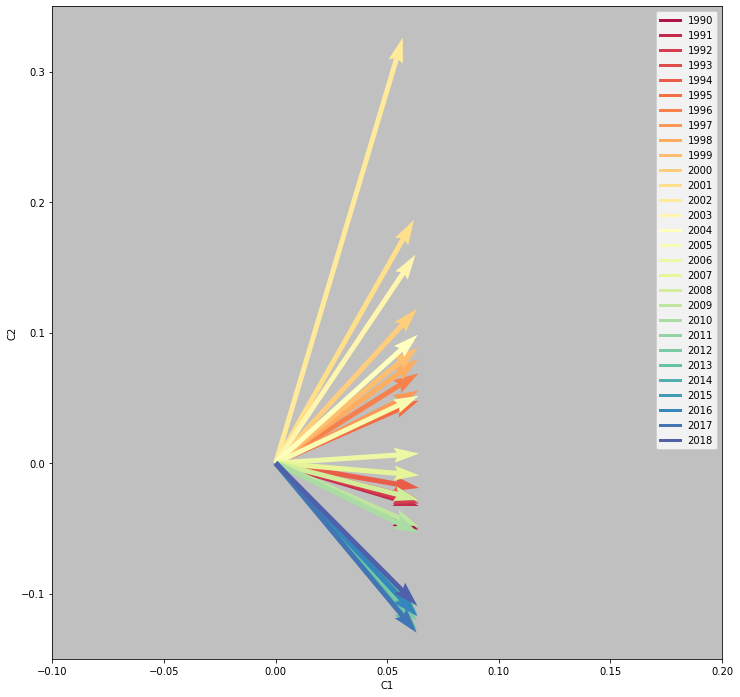

In [ ]:
plot_pca_fac(pca, [-0.1, 0.2, -0.15, 0.35])

#### Ambiente


In [ ]:
data_ambiente = data[data.Indi == "Environment"]

In [ ]:
data_ambiente.shape

(15, 32)

In [ ]:
from sklearn import preprocessing
std_scale=preprocessing.StandardScaler().fit(data_ambiente.iloc[:, 3:33])
X_scaled=std_scale.transform(data_ambiente.iloc[:, 3:33]) 

In [ ]:
from sklearn import decomposition
pca=decomposition.PCA(n_components=4) 
pca.fit(X_scaled) #input data is centered but not scaled for each feature before applying the SVD

# proporción de varianza
print('proporción de varianza por componente: ', pca.explained_variance_ratio_)
# proporción de varianza acumulada
print ('proporción de varianza por componente acumulada: ', pca.explained_variance_ratio_.cumsum())

X_projected=pca.transform(X_scaled) #numpy array
print ('tamaño de los datos: ', X_projected.shape)

proporción de varianza por componente:  [9.84519809e-01 1.49601221e-02 3.43323707e-04 1.70051113e-04]
proporción de varianza por componente acumulada:  [0.98451981 0.99947993 0.99982326 0.99999331]
tamaño de los datos:  (15, 4)


In [ ]:
df = pd.DataFrame(data=X_projected, columns=["C1", "C2", "C3", "C4"])

In [ ]:
df.shape

(15, 4)

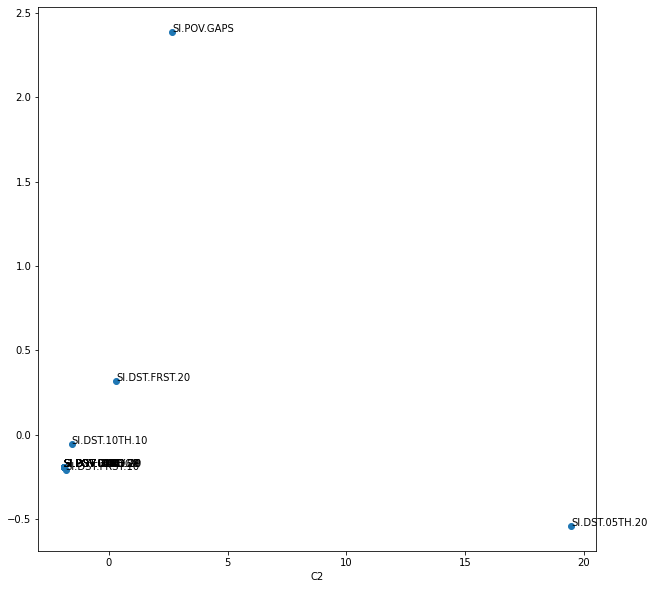

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(df.C1, df.C2)
ax.set_xlabel("C1")
ax.set_xlabel("C2")

for i, txt in enumerate(data_pobreza.ICod):
    plt.annotate(txt, (df.C1[i], df.C2[i]))

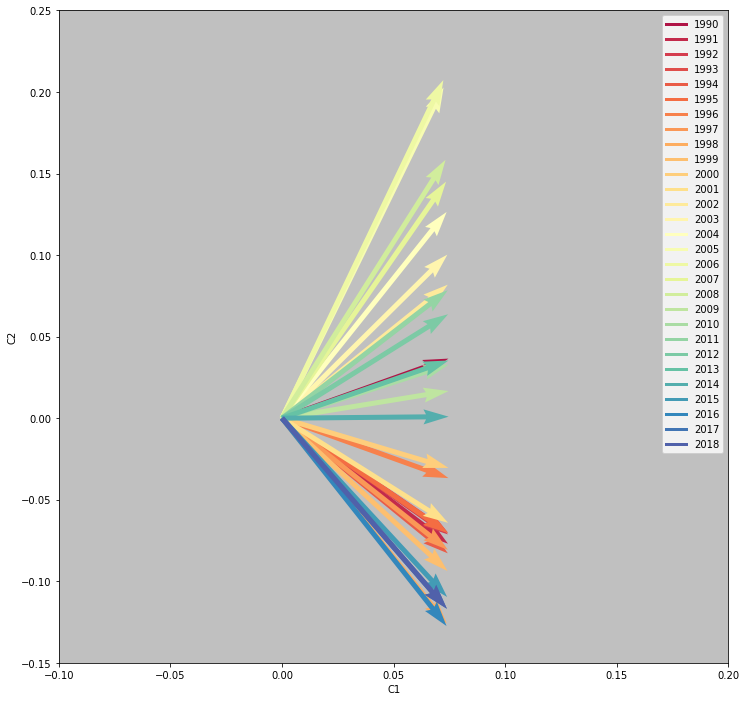

In [ ]:
plot_pca_fac(pca, [-0.1, 0.2, -0.15, 0.25])

#### Salud


In [ ]:
data_salud = data[data.Indi == "Health"]

In [ ]:
data_salud.shape

(15, 32)

In [ ]:
from sklearn import preprocessing
std_scale=preprocessing.StandardScaler().fit(data_salud.iloc[:, 3:33])
X_scaled=std_scale.transform(data_salud.iloc[:, 3:33]) 

In [ ]:
from sklearn import decomposition
pca=decomposition.PCA(n_components=4) 
pca.fit(X_scaled) #input data is centered but not scaled for each feature before applying the SVD

# proporción de varianza
print('proporción de varianza por componente: ', pca.explained_variance_ratio_)
# proporción de varianza acumulada
print ('proporción de varianza por componente acumulada: ', pca.explained_variance_ratio_.cumsum())

X_projected=pca.transform(X_scaled) #numpy array
print ('tamaño de los datos: ', X_projected.shape)

proporción de varianza por componente:  [9.97980189e-01 1.83874852e-03 9.86439198e-05 4.97725663e-05]
proporción de varianza por componente acumulada:  [0.99798019 0.99981894 0.99991758 0.99996735]
tamaño de los datos:  (15, 4)


In [ ]:
df = pd.DataFrame(data=X_projected, columns=["C1", "C2", "C3", "C4"])

In [ ]:
df.shape

(15, 4)

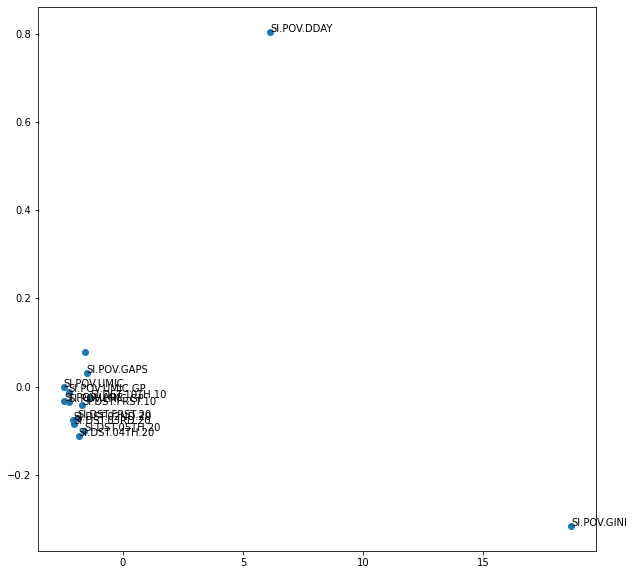

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(df.C1, df.C2)

for i, txt in enumerate(data_pobreza.ICod):
    plt.annotate(txt, (df.C1[i], df.C2[i]))

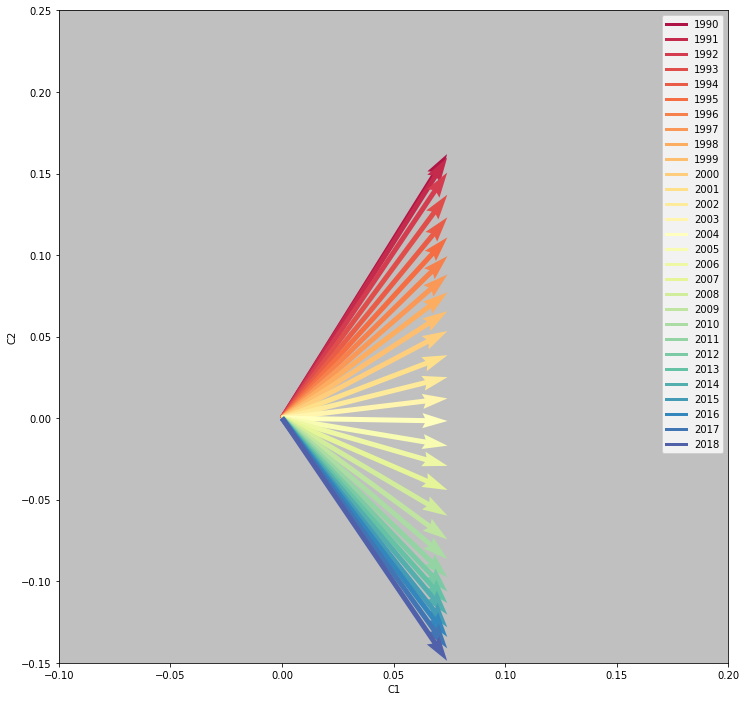

In [ ]:
plot_pca_fac(pca, [-0.1, 0.2, -0.15, 0.25])

#### Protección social


In [ ]:
data_proteccionsocial = data[data.Indi == "Social_protection"]

In [ ]:
data_proteccionsocial.shape

(15, 32)

In [ ]:
from sklearn import preprocessing
std_scale=preprocessing.StandardScaler().fit(data_proteccionsocial.iloc[:, 3:33])
X_scaled=std_scale.transform(data_proteccionsocial.iloc[:, 3:33]) 

In [ ]:
from sklearn import decomposition
pca=decomposition.PCA(n_components=4) 
pca.fit(X_scaled) #input data is centered but not scaled for each feature before applying the SVD

# proporción de varianza
print('proporción de varianza por componente: ', pca.explained_variance_ratio_)
# proporción de varianza acumulada
print ('proporción de varianza por componente acumulada: ', pca.explained_variance_ratio_.cumsum())

X_projected=pca.transform(X_scaled) #numpy array
print ('tamaño de los datos: ', X_projected.shape)

proporción de varianza por componente:  [0.9852851  0.01148206 0.00150452 0.00112887]
proporción de varianza por componente acumulada:  [0.9852851  0.99676715 0.99827167 0.99940054]
tamaño de los datos:  (15, 4)


In [ ]:
df = pd.DataFrame(data=X_projected, columns=["C1", "C2", "C3", "C4"])

In [ ]:
df.shape

(15, 4)

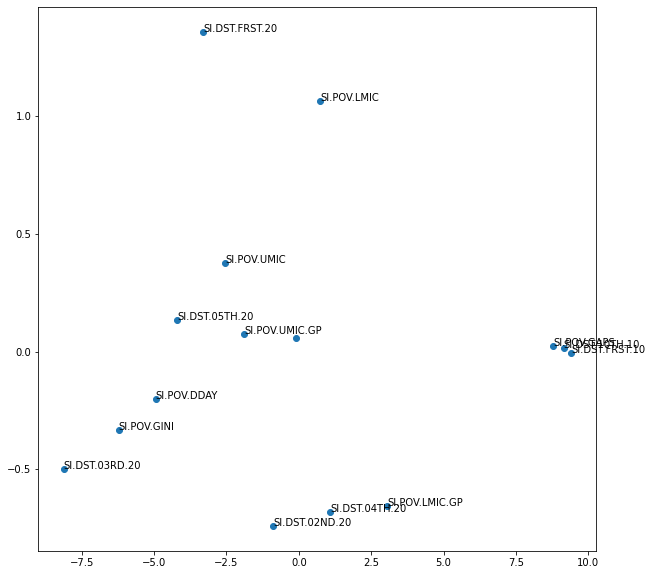

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(df.C1, df.C2)

for i, txt in enumerate(data_pobreza.ICod):
    plt.annotate(txt, (df.C1[i], df.C2[i]))

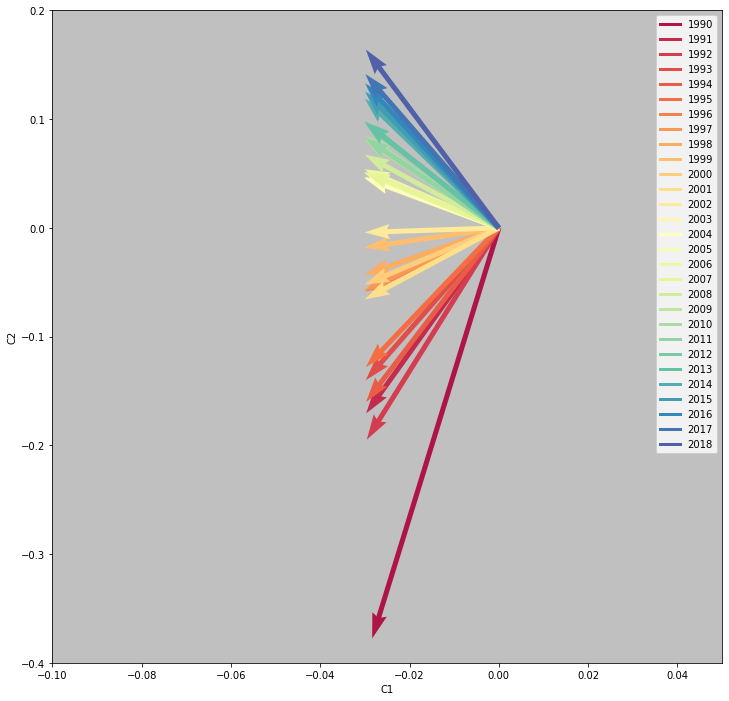

In [ ]:
plot_pca_fac(pca, [-0.1, 0.05, -0.4, 0.2])

#### Género


In [ ]:
data_genero = data[data.Indi == "Gender"]

In [ ]:
data_genero.shape

(15, 32)

In [ ]:
from sklearn import preprocessing
std_scale=preprocessing.StandardScaler().fit(data_genero.iloc[:, 3:33])
X_scaled=std_scale.transform(data_genero.iloc[:, 3:33]) 

In [ ]:
from sklearn import decomposition
pca=decomposition.PCA(n_components=4) 
pca.fit(X_scaled) #input data is centered but not scaled for each feature before applying the SVD

# proporción de varianza
print('proporción de varianza por componente: ', pca.explained_variance_ratio_)
# proporción de varianza acumulada
print ('proporción de varianza por componente acumulada: ', pca.explained_variance_ratio_.cumsum())

X_projected=pca.transform(X_scaled) #numpy array
print ('tamaño de los datos: ', X_projected.shape)

proporción de varianza por componente:  [9.86460314e-01 1.26716218e-02 6.67522880e-04 1.40105563e-04]
proporción de varianza por componente acumulada:  [0.98646031 0.99913194 0.99979946 0.99993956]
tamaño de los datos:  (15, 4)


In [ ]:
df = pd.DataFrame(data=X_projected, columns=["C1", "C2", "C3", "C4"])

In [ ]:
df.shape

(15, 4)

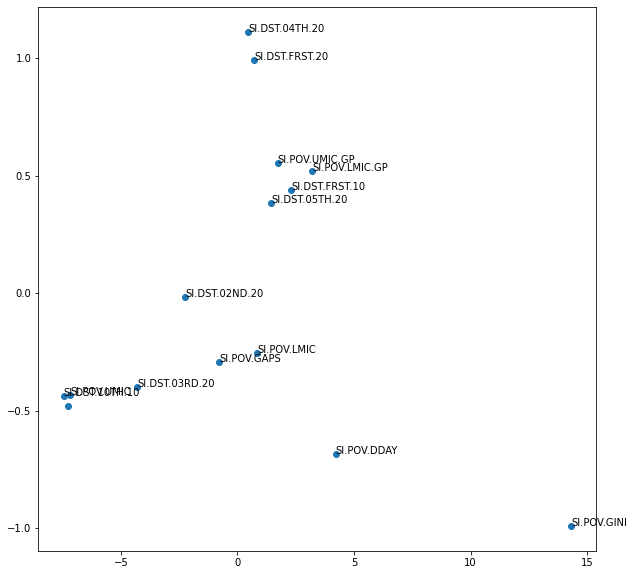

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(df.C1, df.C2)

for i, txt in enumerate(data_pobreza.ICod):
    plt.annotate(txt, (df.C1[i], df.C2[i]))

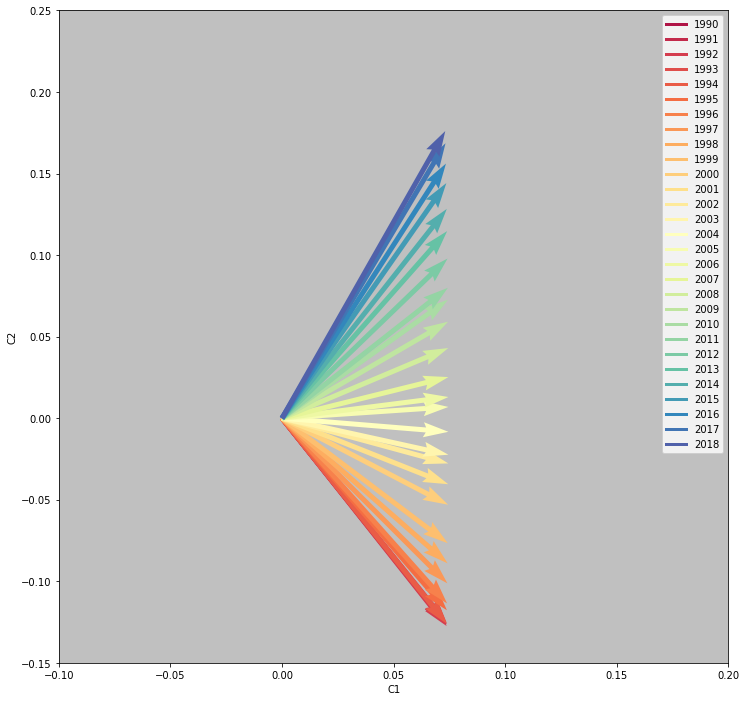

In [ ]:
plot_pca_fac(pca, [-0.1, 0.2, -0.15, 0.25])

#### Education


In [ ]:
data_educacion = data[data.Indi == "Education"]

In [ ]:
data_educacion.shape

(15, 32)

In [ ]:
from sklearn import preprocessing
std_scale=preprocessing.StandardScaler().fit(data_educacion.iloc[:, 3:33])
X_scaled=std_scale.transform(data_educacion.iloc[:, 3:33]) 

In [ ]:
from sklearn import decomposition
pca=decomposition.PCA(n_components=4) 
pca.fit(X_scaled) #input data is centered but not scaled for each feature before applying the SVD

# proporción de varianza
print('proporción de varianza por componente: ', pca.explained_variance_ratio_)
# proporción de varianza acumulada
print ('proporción de varianza por componente acumulada: ', pca.explained_variance_ratio_.cumsum())

X_projected=pca.transform(X_scaled) #numpy array
print ('tamaño de los datos: ', X_projected.shape)

proporción de varianza por componente:  [9.95176712e-01 4.58415811e-03 1.91320059e-04 4.78097873e-05]
proporción de varianza por componente acumulada:  [0.99517671 0.99976087 0.99995219 1.        ]
tamaño de los datos:  (15, 4)


In [ ]:
df = pd.DataFrame(data=X_projected, columns=["C1", "C2", "C3", "C4"])

In [ ]:
df.shape

(15, 4)

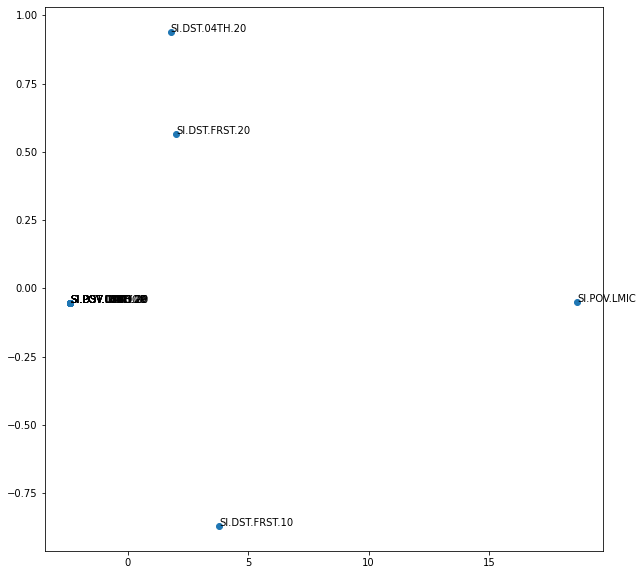

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(df.C1, df.C2)

for i, txt in enumerate(data_pobreza.ICod):
    plt.annotate(txt, (df.C1[i], df.C2[i]))

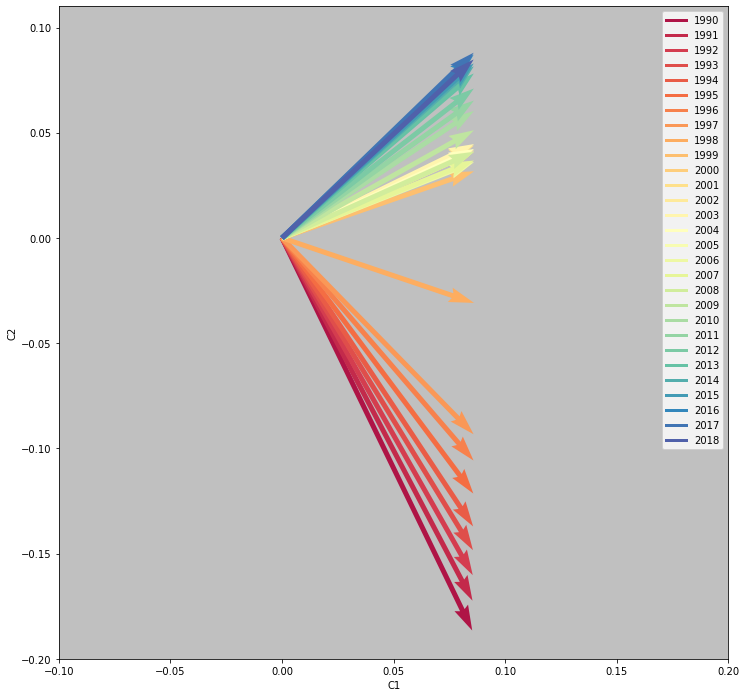

In [ ]:
plot_pca_fac(pca, [-0.1, 0.2, -0.2, 0.11])

### PCA + clustering

A modo de ejemplo, utilizaremos los componentes principales obtenidos al analizar el indicador Pobreza, y aplicaremos clustering. De esta forma, observaremos si existen clusters que asocian Features de Salud que se comportan de manera similar a lo largo del tiempo. Utilizaremos KMeans.

In [ ]:
std_scale=preprocessing.StandardScaler().fit(data_pobreza.iloc[:, 3:33])
X_scaled=std_scale.transform(data_pobreza.iloc[:, 3:33]) 

In [ ]:
pca=decomposition.PCA(n_components=4) 
pca.fit(X_scaled) #input data is centered but not scaled for each feature before applying the SVD

# proporción de varianza
print('proporción de varianza por componente: ', pca.explained_variance_ratio_)
# proporción de varianza acumulada
print ('proporción de varianza por componente acumulada: ', pca.explained_variance_ratio_.cumsum())

X_projected=pca.transform(X_scaled) #numpy array
print ('tamaño de los datos: ', X_projected.shape)

proporción de varianza por componente:  [9.75683837e-01 2.35442405e-02 6.11781312e-04 9.42338999e-05]
proporción de varianza por componente acumulada:  [0.97568384 0.99922808 0.99983986 0.99993409]
tamaño de los datos:  (14, 4)


In [ ]:
df = pd.DataFrame(data=X_projected, columns=["C1", "C2", "C3", "C4"])

In [ ]:
df

,C1,C2,C3,C4
0,-4.715983,-0.124405,-0.136585,-0.080264
1,6.047483,0.041587,-0.256366,0.010029
2,-4.739271,-0.619729,-0.128880,0.046025
3,11.653128,-0.095796,-0.019742,-0.010334
4,-3.823088,-0.776653,-0.105238,0.065803
5,2.127514,-1.010795,0.299976,0.006389
6,-2.265487,-0.890411,-0.019393,0.041623
7,-0.528870,-0.979624,0.141628,0.025154
8,-4.243450,0.216537,-0.025607,-0.063096
9,-3.009713,0.774643,0.037099,-0.015636


In [ ]:
scores = [KMeans(n_clusters=i+2).fit(df).inertia_ for i in range(9)]

Text(0.5, 1.0, 'Inertia de k-Means versus número de clusters')

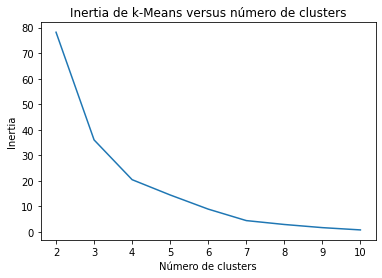

In [ ]:
from matplotlib import pyplot as plt
plt.plot(np.arange(2, 11), scores)
plt.xlabel('Número de clusters')
plt.ylabel("Inertia")
plt.title("Inertia de k-Means versus número de clusters")

Según el gráfico, el "codo" no se distingue claramente, pudiendo estar entre 4 y 7. Realizaremos gráficos de silueta para obtener más información para decidir.

Para n_clusters = 4 El coeficiente de silueta medio fue: 0.5209467884622083
Para n_clusters = 5 El coeficiente de silueta medio fue: 0.48171550663086815
Para n_clusters = 6 El coeficiente de silueta medio fue: 0.3766913579428654
Para n_clusters = 7 El coeficiente de silueta medio fue: 0.4319794622996876


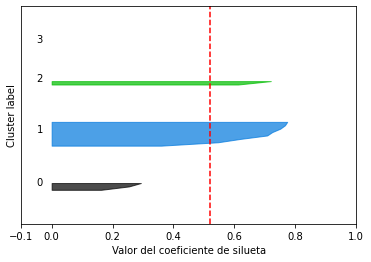

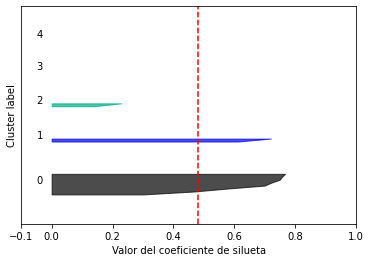

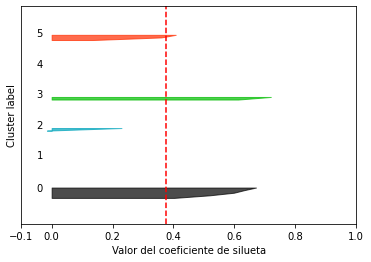

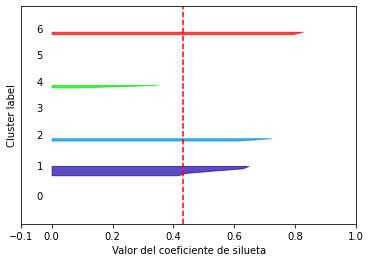

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = [4, 5, 6, 7]

X = df

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots()

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("Para n_clusters =", n_clusters,
          "El coeficiente de silueta medio fue:", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_xlabel("Valor del coeficiente de silueta")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

El análisis de silueta tampoco es definitorio, aunque el número de clusters igual a 4 arroja 3 bloques de grosor similar.

In [ ]:
# Número de clusters buscado
n_clust = 4

km = KMeans(n_clusters=n_clust, random_state=13)
km.fit(df)

# Recuperacion de etiquetas
clusters = km.labels_
print('Suma de los cuadrados de las distancias al cluster / Inertia: ', km.inertia_)

Suma de los cuadrados de las distancias al cluster / Inertia:  20.47250148298101


In [ ]:
clusters

array([2, 3, 2, 1, 2, 0, 2, 0, 2, 2, 2, 0, 2, 1], dtype=int32)

Asociemos los clusters generados con los Features en un dataframe.

In [ ]:
d = {"Feature": data_pobreza.Feat, "ICod": data_pobreza.ICod, "cluster": clusters}
df_clust = pd.DataFrame(d)
df_clust

,Feature,ICod,cluster
6,"Brecha de pobreza a $1,90 por día (2011 PPA) (%)",SI.POV.GAPS,2
26,Participación en el ingreso del 10% mejor remu...,SI.DST.10TH.10,3
27,Participación en el ingreso del 10% peor remun...,SI.DST.FRST.10,2
28,Participación en el ingreso del 20% mejor remu...,SI.DST.05TH.20,1
29,Participación en el ingreso del 20% peor remun...,SI.DST.FRST.20,2
30,Participación en el ingreso del cuarto quintil...,SI.DST.04TH.20,0
31,Participación en el ingreso del segundo quinti...,SI.DST.02ND.20,2
32,Participación en el ingreso del tercer quintil...,SI.DST.03RD.20,0
51,Poverty gap at $3.20 a day (2011 PPP) (%),SI.POV.LMIC.GP,2
52,Poverty gap at $5.50 a day (2011 PPP) (%),SI.POV.UMIC.GP,2


Recordemos el gráfico con dos componentes principales para Pobreza:

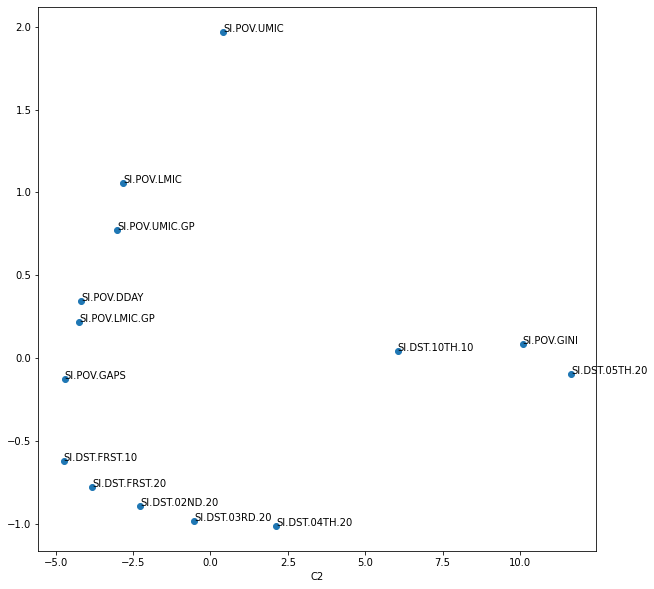

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(df.C1, df.C2)
ax.set_xlabel("C1")
ax.set_xlabel("C2")

for i, txt in enumerate(data_pobreza.ICod):
    plt.annotate(txt, (df.C1[i], df.C2[i]))

En función del gráfico y del clustering, se puede distinguir, por ejemplo, una asociación entre los Features SI.POV.GINI y SI.DST.05TH.20, perteneciendo estos al mismo cluster.

Se interpreta que, a lo largo del tiempo, estas Features se comportan de manera similar. Corrobaremos esto graficando la tendencia temporal de ambos Features. 

In [ ]:
# Carga del dataset en formato long
data_long = pd.read_csv(BASE_DIR + 'dataset_ARG_1990_2018.csv')

In [ ]:
data_long.head()

,Feat,Indi,Pais,CCod,ICod,Year,Value
0,Población entre 15 y 64 años de edad (% del to...,Education,Argentina,ARG,SP.POP.1564.TO.ZS,1990,6.029160e+01
1,Población entre 0 y 14 años de edad (% del total),Education,Argentina,ARG,SP.POP.0014.TO.ZS,1990,3.078601e+01
2,"Desempleo, varones (% de la población activa m...",Education,Argentina,ARG,SL.UEM.TOTL.MA.ZS,1990,5.236000e+00
3,"Desempleo, mujeres (% de la población activa f...",Education,Argentina,ARG,SL.UEM.TOTL.FE.ZS,1990,5.747000e+00
4,"Población activa, total",Education,Argentina,ARG,SL.TLF.TOTL.IN,1990,1.358077e+07


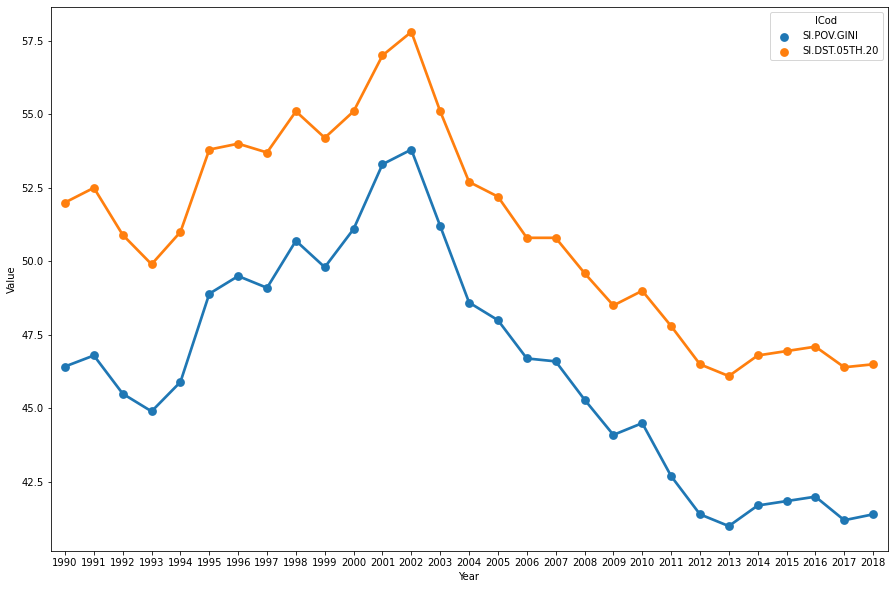

In [ ]:
tmp_df = data_long[(data_long.ICod == "SI.POV.GINI") | (data_long.ICod == "SI.DST.05TH.20")] 

plt.figure(figsize=(15,10))
sns.pointplot(x = "Year", y = "Value", hue = "ICod", data = tmp_df)

Se confirma la tendencia temporal muy similar entre ambos Features. Debido a esto, podría calcularse solo una de ellas, y calcular los valores de la otra en función de la Feature "medida" en la población. 

## Conclusiones

Las transformaciones ofrecidas dentro de scikit-learn no fueron suficientes para escalar los datos adecuadamente. En cambio, la transformación logarítmica escaló de manera más adecuada, juntando aquellos valores inicialmente muy separados. Sin embargo, luego de aplicar diferentes métodos de clustering, no se observaron asociaciones cluster-indicador. Esto indica que los Features se asocian por otros factores.

El Ánalisis de Componentes Principales (PCA) por indicador, arrojó en todos los casos un componente principal que explicó prácticamente el 100% de la variabilidad de los datos. A su vez, los gráficos de a dos componentes mostraron asociaciones entre diferentes Features.

Se realizaó PCA con el dataset correspondiente al indicador de Pobreza, y clustering con KMeans. De esta manera, si bien el número de clusters óptimo no pudo definirse completamente, se observaron asociaciones entre Features que fueron luego confirmadas mediante los gráficos de sus valores en función del tiempo. Así, siendo que existen Features muy asociadas entre sí, el PCA + clustering reafirmó de manera as sólida lo observado en prácticos anteriores: la existencia de Features correlacionados. En función de la consigna propuesta, podría destinarse el presupuesto al cálculo de un Feature representativo de los clusters generados (mediante PCA + clustering), y calcular el resto de ellas mediante transformaciones adecuadas de los valores de la Feature elegida como representante.

